In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
#sys.path.append('/Users/MYK/Desktop/IRES')

import matplotlib.pyplot as plt
import numpy as np
import utils as u
import fake_profile as fp
from astropy.modeling import models, fitting
import scipy.optimize as so

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def gaussian(x, a1, a2, a3, m1, m2, m3, sd1, sd2, sd3):
    model = models.Gaussian1D(a1, m1, sd1) + models.Gaussian1D(a2, m2, sd2) + \
            models.Gaussian1D(a3, m3, sd3)
    return model(x)

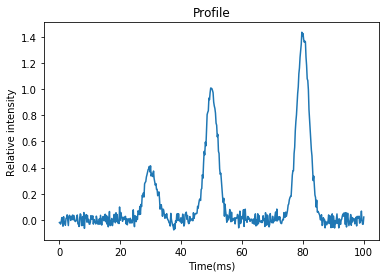

In [15]:
a1 = [2, 5, 7]
mu1 = [30, 50,80]
sd1 = [2, 2, 2]

prof = fp.fake_profile(a1,mu1,sd1)
prof.construct_profile(noise=True)
prof.plot()

In [16]:
x = prof.domain
a_guess = [.6, 1, 1.4]
mu_guess = [32, 52, 81]
sd_guess = [1, 2, 2]

#params = []
#cov = []

#for i in range(len(a_guess)):
params, cov = so.curve_fit(gaussian, x, prof.profile, p0=[a_guess, mu_guess, sd_guess])
    #params += p.tolist()
    #cov += c.tolist()

In [17]:
np.sqrt(np.diag(cov))

array([0.00871027, 0.00877904, 0.00875285, 0.05242508, 0.02034168,
       0.01440156, 0.05242508, 0.02034168, 0.01440156])